<a href="https://colab.research.google.com/github/DanielP53/Labs-SP1/blob/master/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#indicamos que se usara la version 2 de Tensorflow y se importa
%tensorflow_version 2.x
import tensorflow as tf
#importamos el set de datos desde la libreria de Keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#librerias de ayuda para el manejo de numeros e imagenes
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#utilizado para el darkmode
plt.rc_context({'xtick.color':'w','ytick.color':'w','text.color':'w','axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

train_images shape: (60000, 28, 28)


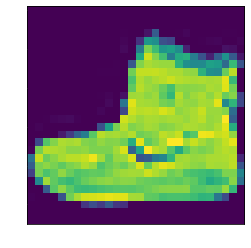

In [13]:
#cargamos el set de datos
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print('train_images shape:',train_images.shape)
#Creamos las clases
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(train_images[0])
plt.show()


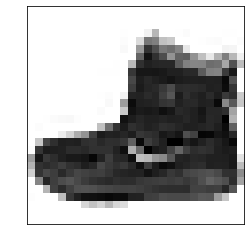

In [14]:
train_images= train_images/255.0
test_images= test_images/255.0
#por que hay que normalizar y estandarizar?
#en la documentacion de tensor no lo convierten a escala de grises... solo lo imprimen como escala de grises.. por que?
#por que se dividia en 255
plt.imshow(train_images[0],cmap=plt.cm.binary)

In [0]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5111 - accuracy: 0.8205
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3803 - accuracy: 0.8628
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3398 - accuracy: 0.8749
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3166 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2974 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2855 - accuracy: 0.8952
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2708 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2589 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2515 - accuracy: 0.9057
Epoch 10/10
60

In [17]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Loss:',test_loss)
print('Accuracy:',test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3615 - accuracy: 0.8736
Loss: 0.3614766116976738
Accuracy: 0.8736


In [21]:
predictions=model.predict(test_images)
predictions[10]

array([3.6762776e-05, 1.2006575e-06, 8.6914450e-02, 8.4904585e-08,
       8.0061632e-01, 8.4262659e-08, 1.1243088e-01, 3.0910380e-10,
       2.2989569e-07, 7.6656050e-08], dtype=float32)

4
Coat


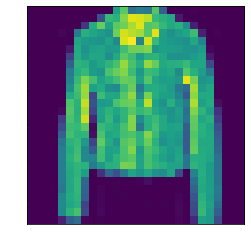

In [26]:
print(np.argmax(predictions[10]))
print(class_names[test_labels[10]])
plt.imshow(test_images[10])